# Studentのt検定



# t分布

$t = Z / √(V/ν)$

- $Z$ は平均0、分散1の標準正規分布に従う確率変数です。
- $V$ は自由度νのカイ²分布に従う確率変数です。
- $ν$ は自由度で、通常はサンプルサイズから1を引いた値$（n − 1）$になります。
- $Z$ と $V$ は独立と仮定されます。

カイ２乗分布は「標準正規分布」から得られるので$V$の期待値は$v$になり、$V$を$ν$で割ることで平均1の比率になり、正規化できる（実際の自由度の値が関係なくなる）。
これで母集団の真の分散σ²の代わりにサンプル分散が持つばらつきを反映できる。

t統計量は標準正規変数 $Z$ を、$√(V/ν)$ という「ばらつき補正項」で割る形になる。

** 自由度$v$の効果**

自由度が小さいと、V/ν のばらつきが大きくなるため、t分布は裾が厚くなり、極端な値が出やすい形になります。逆に、自由度が大きくなると、V/ν が1に近づくため、t分布は標準正規分布に収束していきます。

（t分布とカイ2乗分布の自由度による変化のアニメーション：プレビュー）

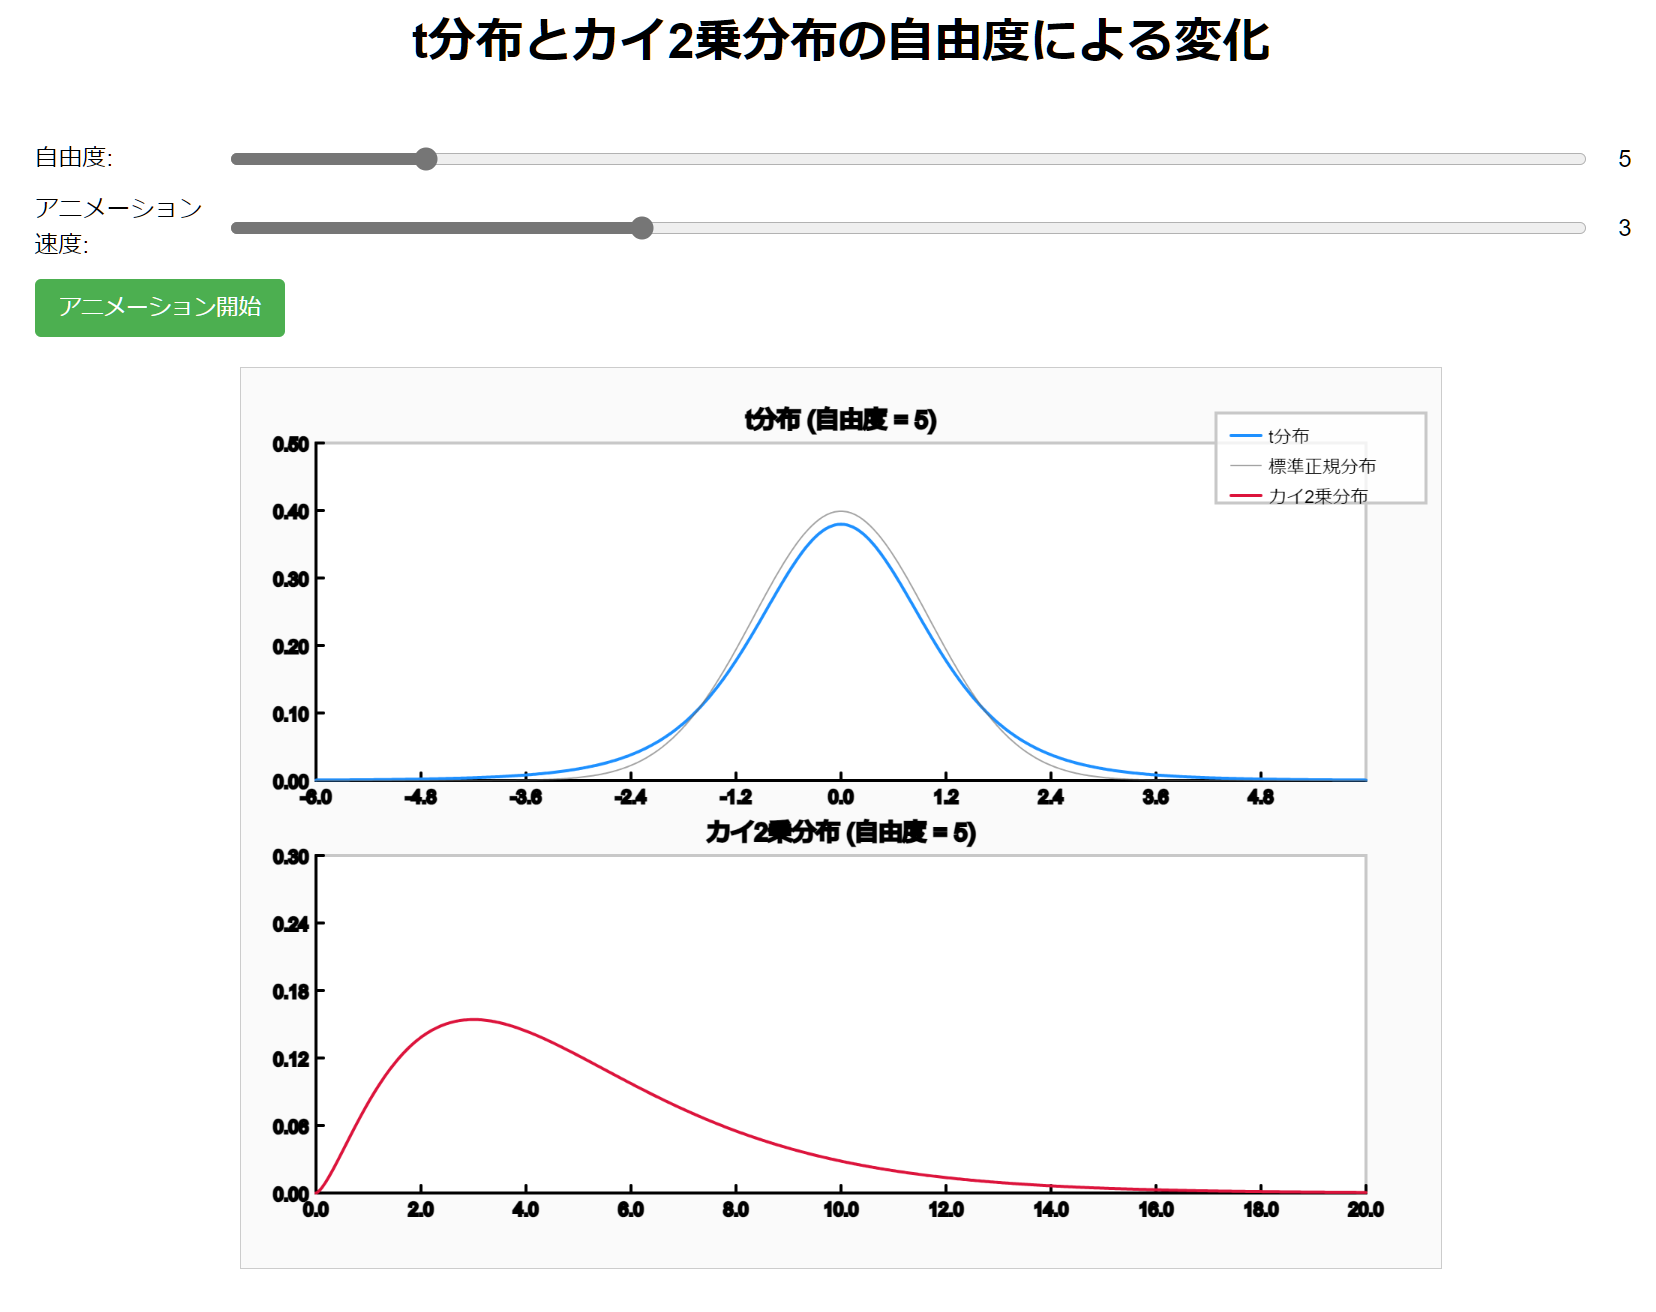

[t分布とカイ2乗分布の自由度による変化のアニメーションのページを開く](https://yoshiwatanabe.github.io/python-test/degree_of_freedom_t_test.html)

## 自由度とt分布

以下のコードで、いくつかの自由度と、対応するt分布を確認できます。

In [ ]:
pip install japanize-matplotlib

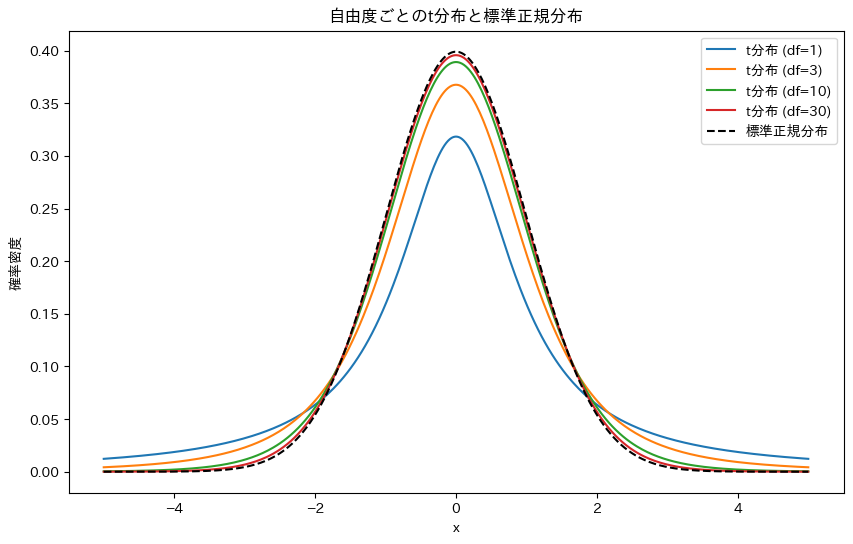

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import t, norm

x = np.linspace(-5, 5, 400)
dfs = [1, 3, 10, 30]

plt.figure(figsize=(10, 6))
for df in dfs:
    plt.plot(x, t.pdf(x, df), label=f't分布 (df={df})')

plt.plot(x, norm.pdf(x, 0, 1), 'k--', label='標準正規分布')
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('自由度ごとのt分布と標準正規分布')
plt.legend()
plt.show()


自由度の影響の特徴

自由度が低い青の分布（df=1）では全体的に厚みがあり、両端が大きい。なぜなら少ないサンプルなので極端な値が出る確率が上がるから。
自由度が高い赤の分布（df=130）では標準正規分布に近づく。なぜなら十分なサンプルなので分散の推定の確実性が上がるから。


# t検定

## 1標本t検定

$$
t = (x̄ − μ) / (s / √n)
$$

- $x̄$：サンプルの平均値  
- $μ$：検定対象となる母平均（または既知の基準値）  
- $s$：サンプル標準偏差（データのばらつきを示す）  
- $n$：サンプルサイズ（自由度は n − 1）

### 【考え方】
- **目的**：1つの集団から抽出したサンプルの平均が、既知または仮定した母平均と統計的に有意に異なるかどうかを検定します。  
- **標準誤差**：分母の $s/√n$ は、サンプル平均のばらつきを示す標準誤差となり、サンプルサイズが大きいほど小さくなります。  
- **t分布との関係**：理論的には、母分散が既知ならば $(x̄ − μ)/(σ/√n)$ は標準正規分布に従いますが、実際には$σ$が不明なため、サンプル標準偏差 $s$ を代用します。  
  このとき、t統計量は  
  $t = Z / √(V/ν)$  
  （Z：標準正規変数、$V$：自由度$ν$のカイ²分布変数）  
の形で導かれ、サンプル分散の不確かさ$（V/ν）$を反映して、自由度 $n − 1$ のt分布に従います。

## 独立2標本t検定

式（等分散を仮定する場合）
$$
t = (x̄₁ − x̄₂) / √[ s_p² (1/n₁ + 1/n₂) ]  
s_p² = [ (n₁ − 1)·s₁² + (n₂ − 1)·s₂² ] / (n₁ + n₂ − 2)
$$

### 【各記号の意味】
- $x̄₁, x̄₂$：それぞれのグループのサンプル平均  
- $s₁, s₂$：各グループの標準偏差  
- $n₁, n₂$：各グループのサンプルサイズ  
- $s_p²$：プールされた分散（両グループのデータのばらつきを合わせたもの）

### 【考え方】
- **目的**：2つの独立した集団の平均値が等しいかどうかを検定します。  
- **プール分散**：両群の分散が等しいと仮定し、各群のサンプルサイズに応じた重み付き平均で分散を推定します。  
- **標準誤差**：差の標準誤差は $√[ s_p² (1/n₁ + 1/n₂) ]$ により求められ、差が標準誤差に比して大きければ t値も大きくなります。  
- **t分布との関係**：分子は2つの標本平均の差で、もし母分散が既知ならば標準正規分布に従いますが、実際は推定値$（s₁, s₂）$を用いるため、ばらつきの補正として各群の分散の推定がカイ²分布の性質を持ちます。結果、t統計量は自由度 $n₁+n₂−2$ のt分布に従います。

## t分布との共通の背景

- **t統計量の一般形**  
  $t = Z / √(V/ν)$  
  - $Z$：母分散が既知の場合に用いる標準正規分布の変数  
  - $V$：サンプル分散（やその拡大版）が従うカイ²分布変数  
  - $ν$：自由度（通常はサンプルサイズから1または2群の場合は n₁+n₂−2）

- **不確実性の反映**  
  母分散が未知の場合、サンプルから推定する標準偏差にはばらつきがあり、そのばらつきがカイ²分布の性質で表されます。  
  そのため、標本平均の差を標準化する際に、推定された標準偏差の不確実性を $√(V/ν)$ という形で補正し、結果としてt統計量はt分布に従います。  
- **自由度の影響**  
  自由度が少ない場合、$V/ν$ のばらつきが大きく、t分布は裾が厚い（極端な値が出やすい）形状になります。自由度が大きくなると、$V/ν$ が1に近づき、t分布は標準正規分布に収束します。

